In [39]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0,1,2,3'
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from niwidgets import NiftiWidget
import tensorflow as tf
from tensorflow.keras.preprocessing.image import * 
from tensorflow import keras
from config import *
import math
import random
import numpy as np
from medio import read_img, save_img
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 373612860826773369
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9919892998608592875
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12574512726197628008
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8960296139591079520
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:2"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2273690685752078870
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:3"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12459023686330719414
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: 

AttributeError: module 'tensorflow_core._api.v2.config' has no attribute 'list_physical_devices'

In [40]:
# Define constants
SEED = 909
BATCH_SIZE_TRAIN = 32
BATCH_SIZE_TEST = 32

IMAGE_HEIGHT = 40
IMAGE_WIDTH = 40
IMAGE_DEPTH = 80
NUM_TRAIN = 400
BATCH_SIZE_TEST =8
BATCH_SIZE_TRAIN=8
NUM_TEST = 200
EPOCH_STEP_TRAIN = NUM_TRAIN // BATCH_SIZE_TRAIN
EPOCH_STEP_TEST = NUM_TEST // BATCH_SIZE_TEST
    
IMG_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_DEPTH)

data_dir = DATA_PATH
#data_dir = '/home/jain0000/Desktop/data/'
data_dir_train = os.path.join(data_dir, 'train/')
# The images should be stored under: "data/slices/training/img/img"
#data_dir_train_image = os.path.join(data_dir_train, 'image')
data_dir_train_image = os.path.join(data_dir_train, 'image/image')

# The images should be stored under: "data/slices/training/mask/img"
data_dir_train_mask = os.path.join(data_dir_train, 'mask/mask')
#data_dir_train_mask = os.path.join(data_dir_train, 'mask')

data_dir_test = os.path.join(data_dir, 'test/')
# The images should be stored under: "data/slices/test/img/img"
data_dir_test_image = os.path.join(data_dir_test, 'image/image')
#data_dir_test_image = os.path.join(data_dir_test, 'cropped_image')
# The images should be stored under: "data/slices/test/mask/img"
data_dir_test_mask = os.path.join(data_dir_test, 'mask/mask')
#data_dir_test_mask = os.path.join(data_dir_test, 'mask')

NUM_TRAIN = 360
NUM_TEST = 100

NUM_OF_EPOCHS = 100

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


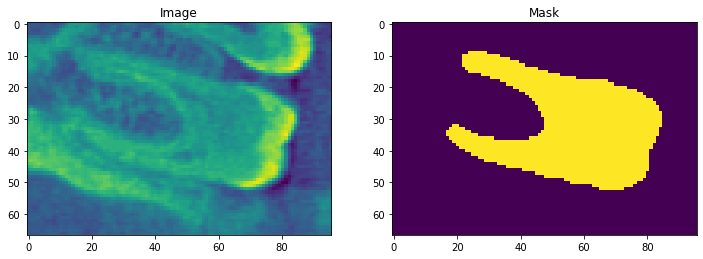

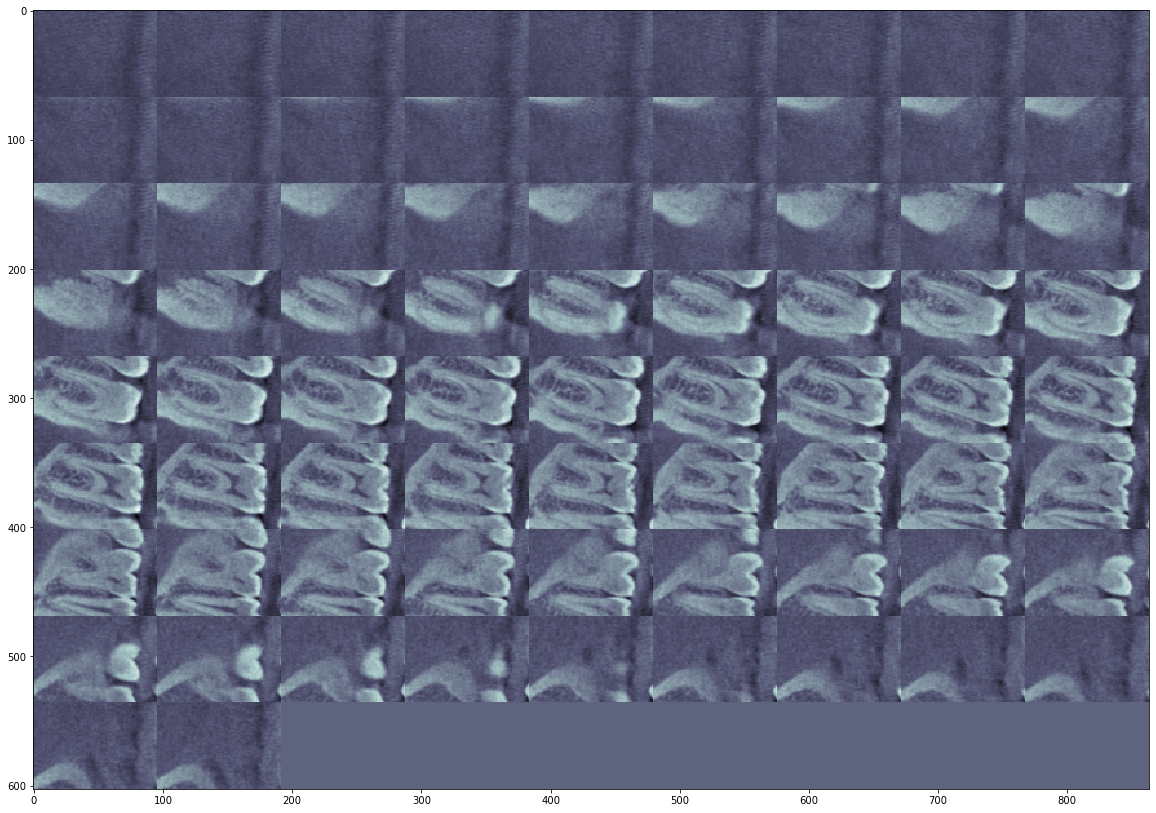

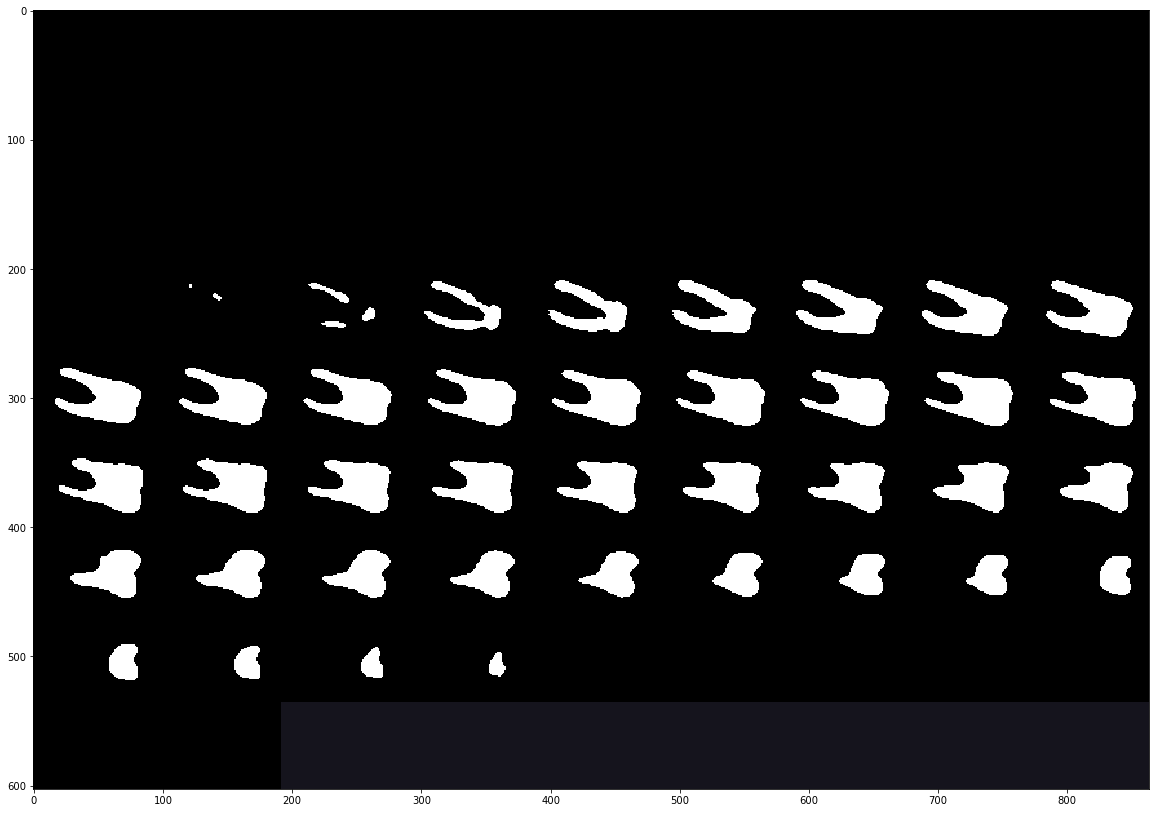

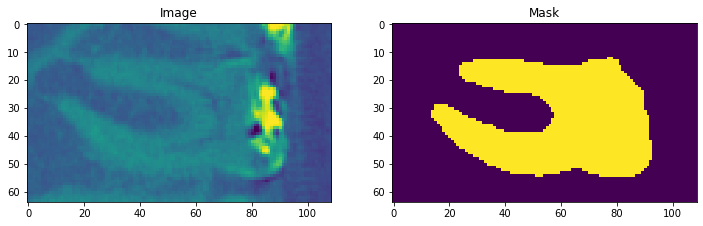

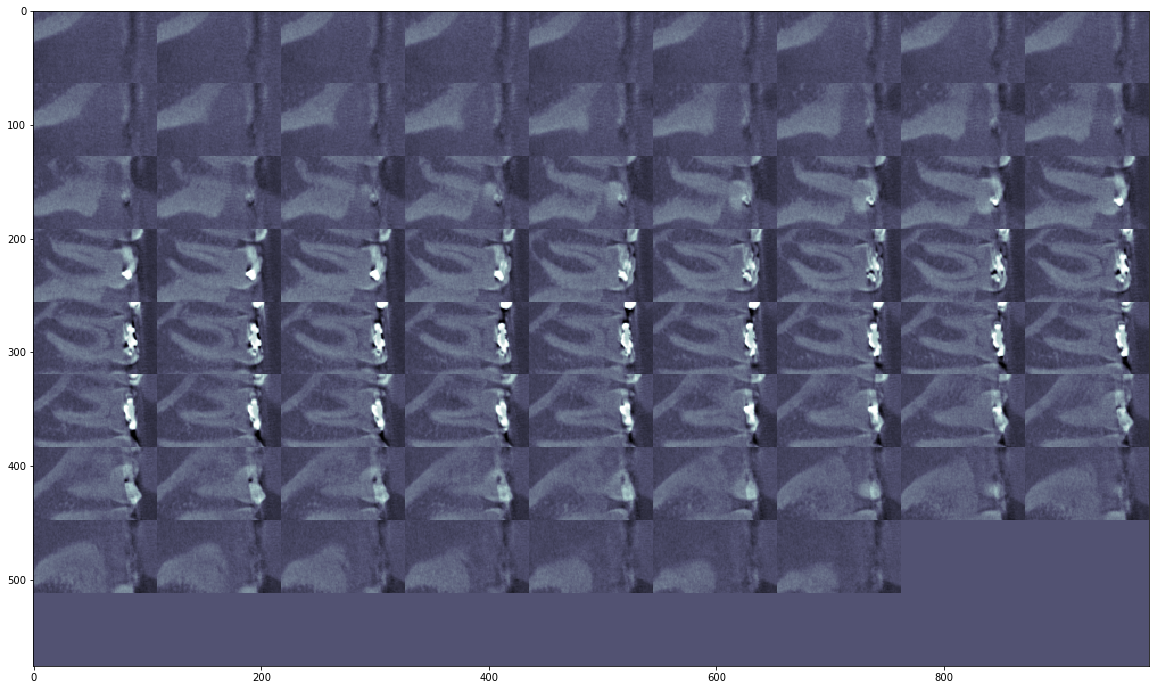

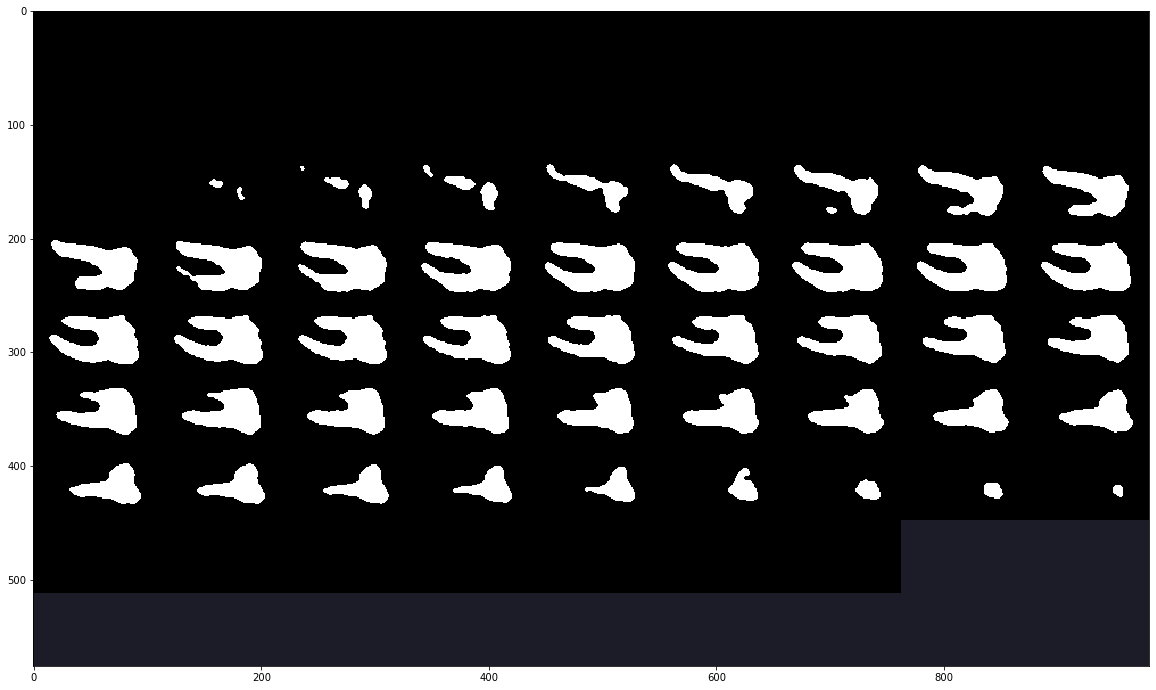

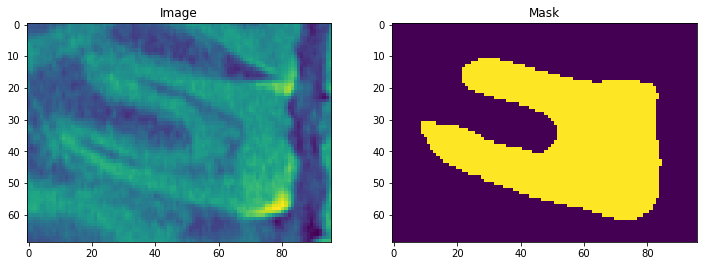

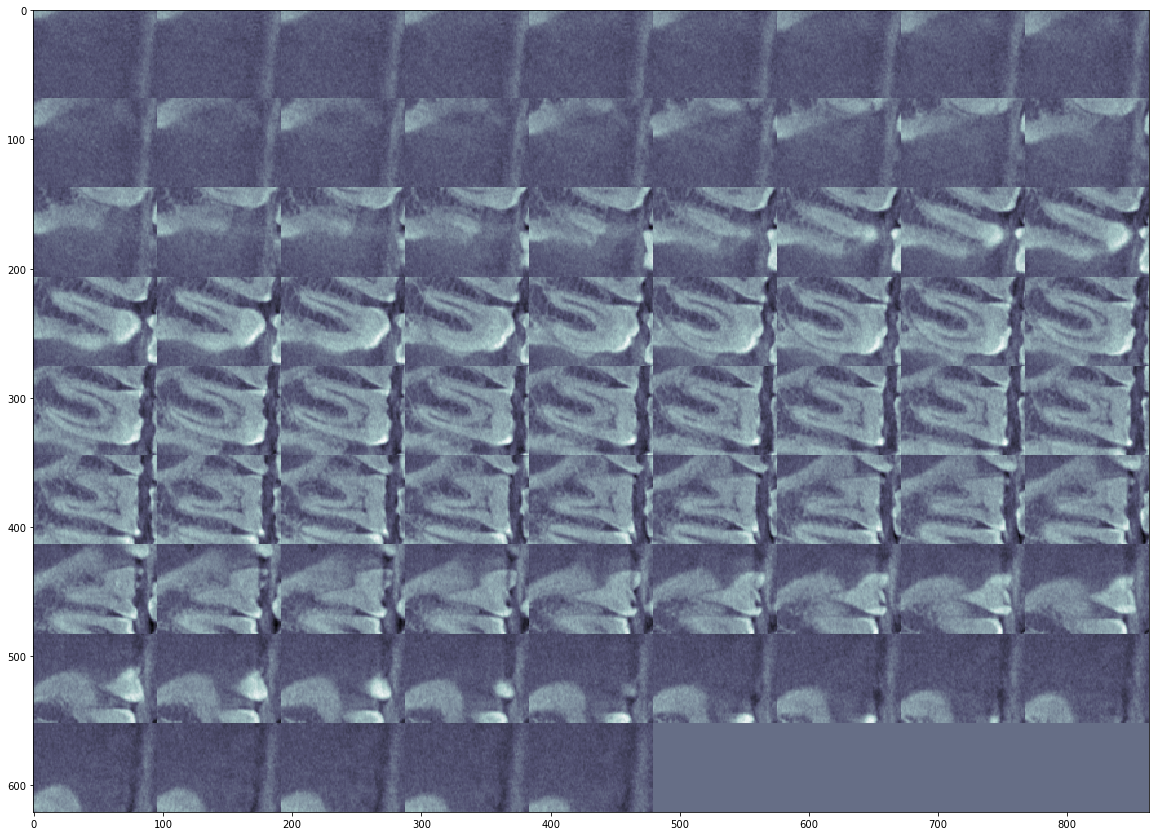

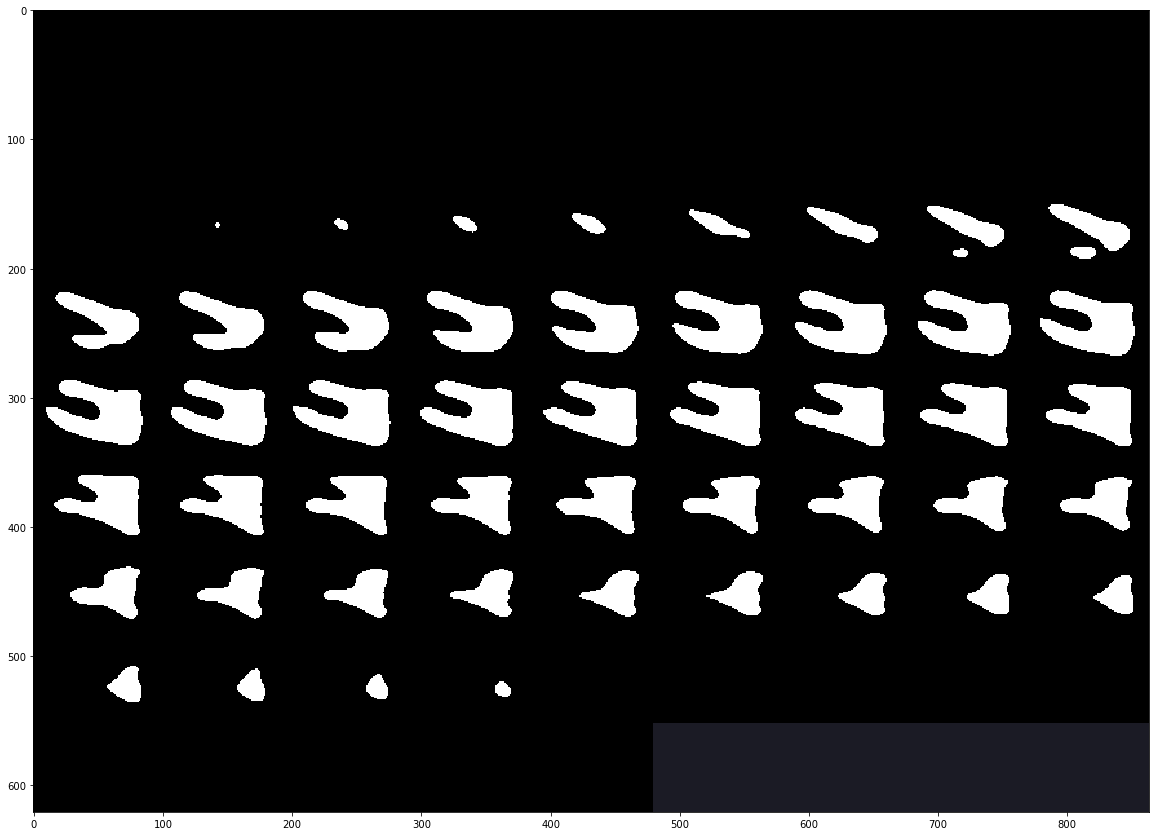

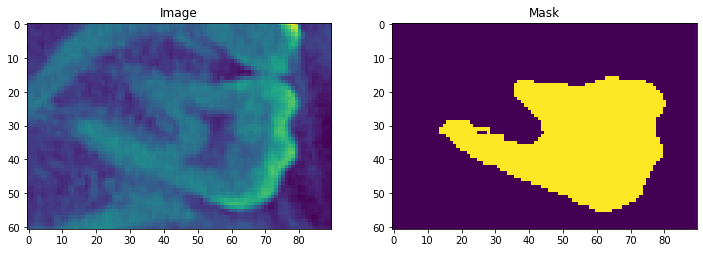

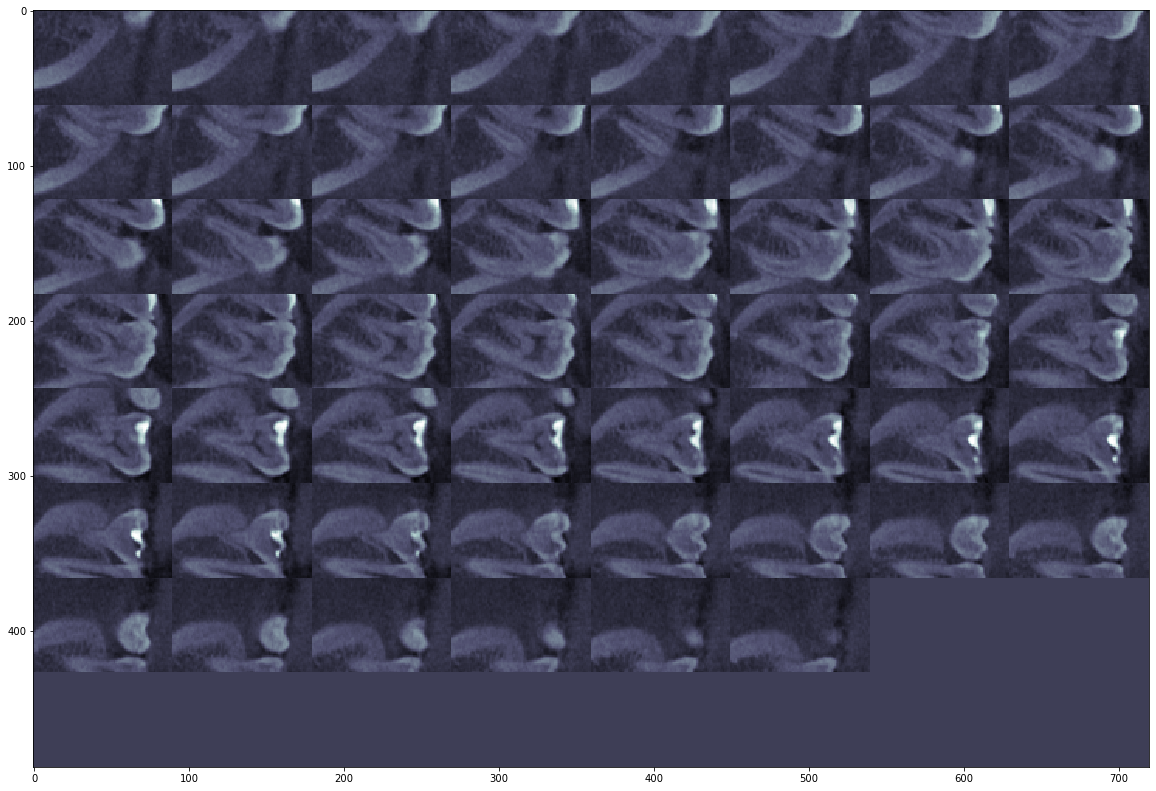

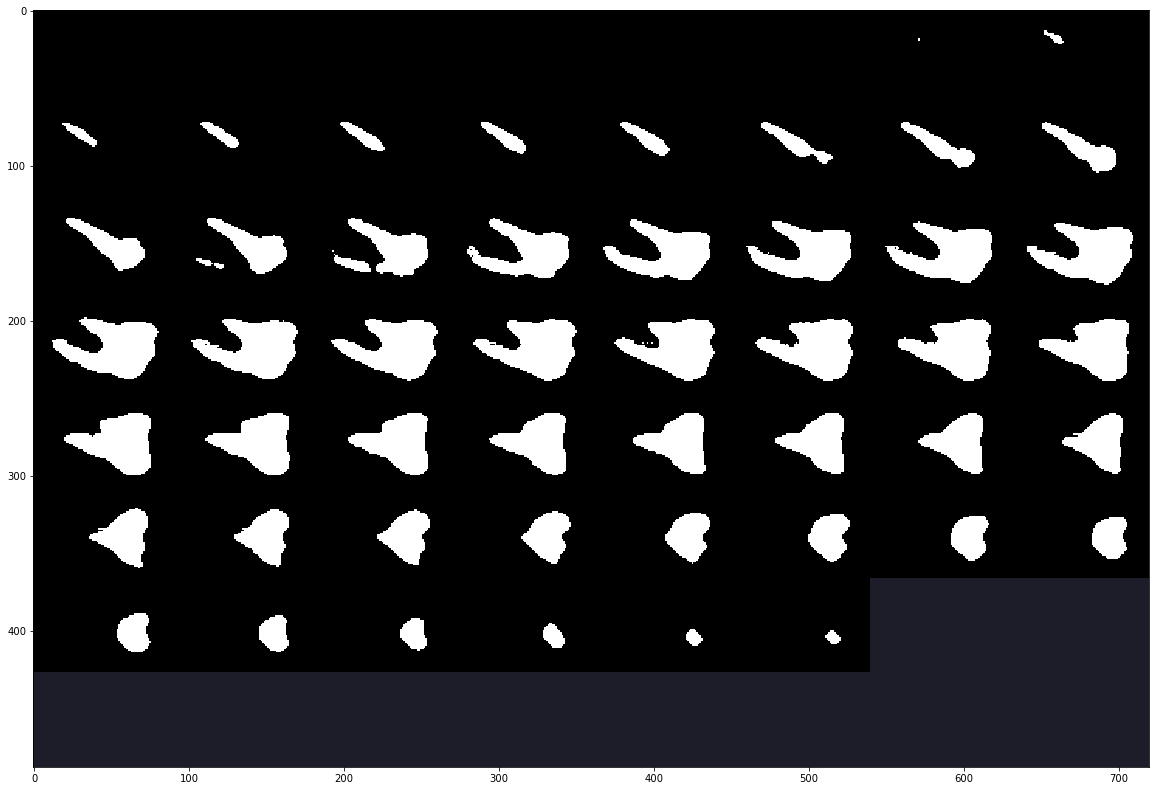

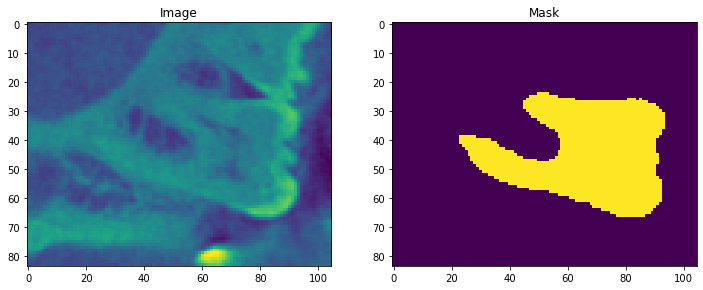

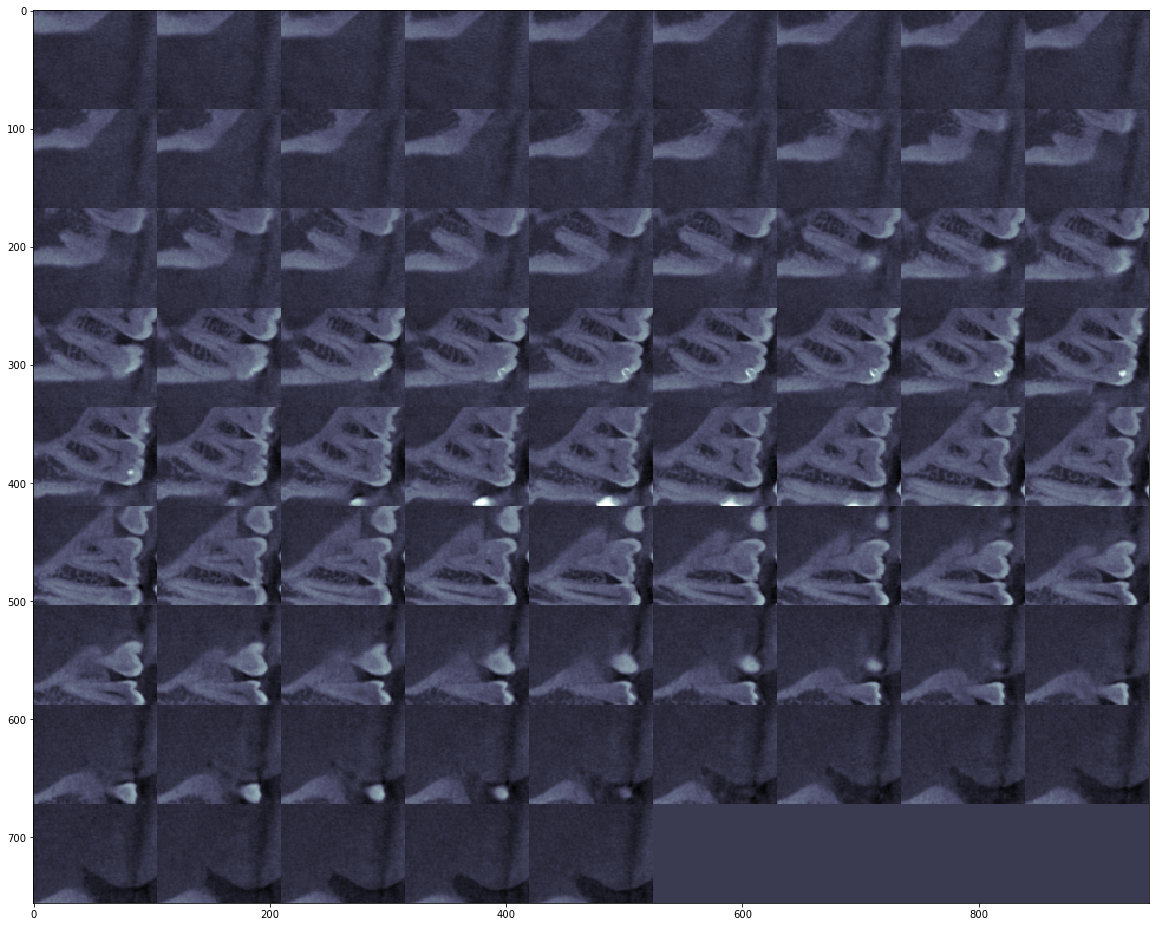

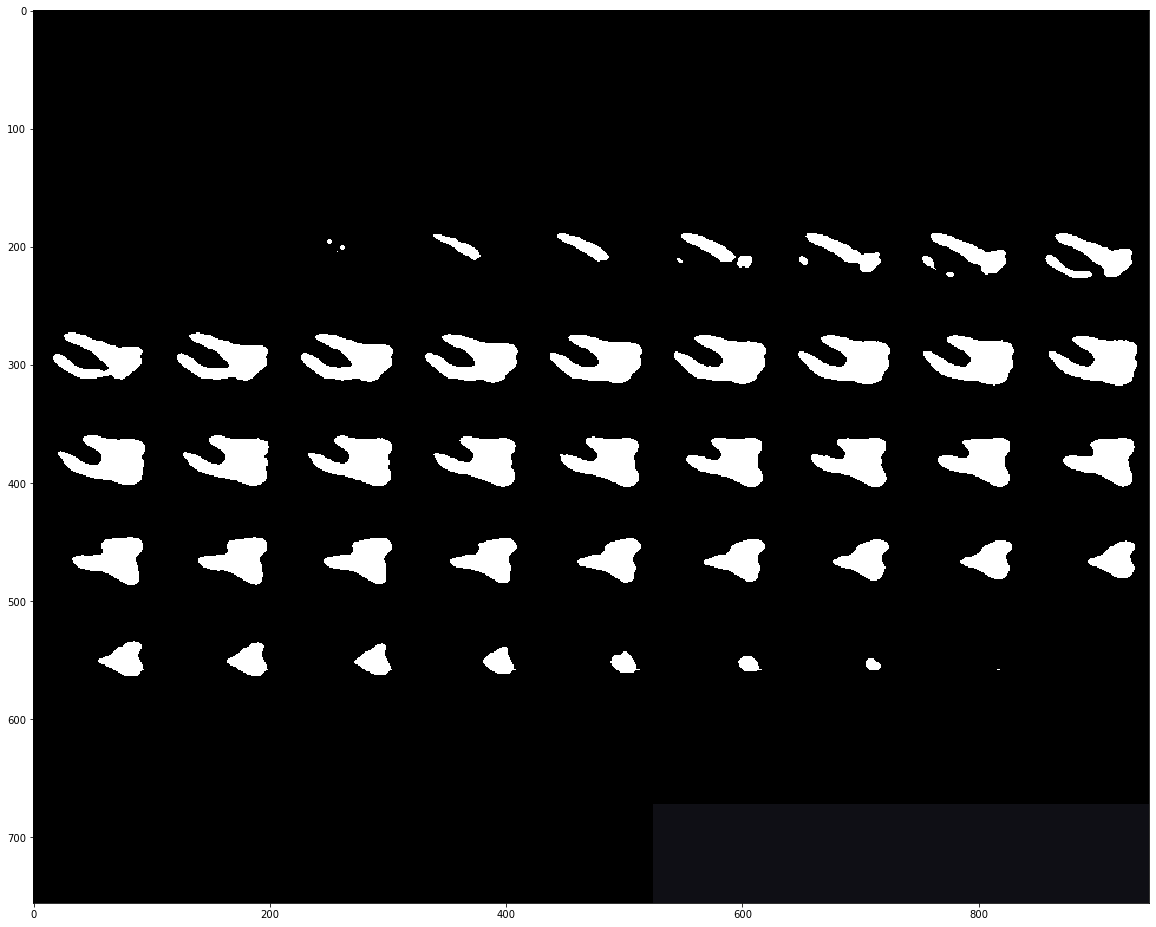

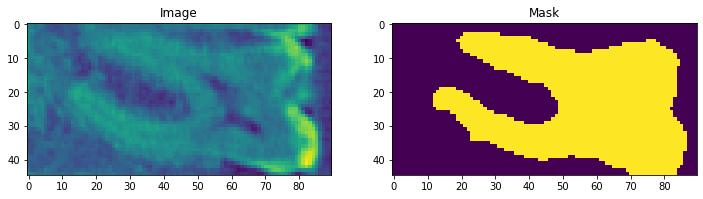

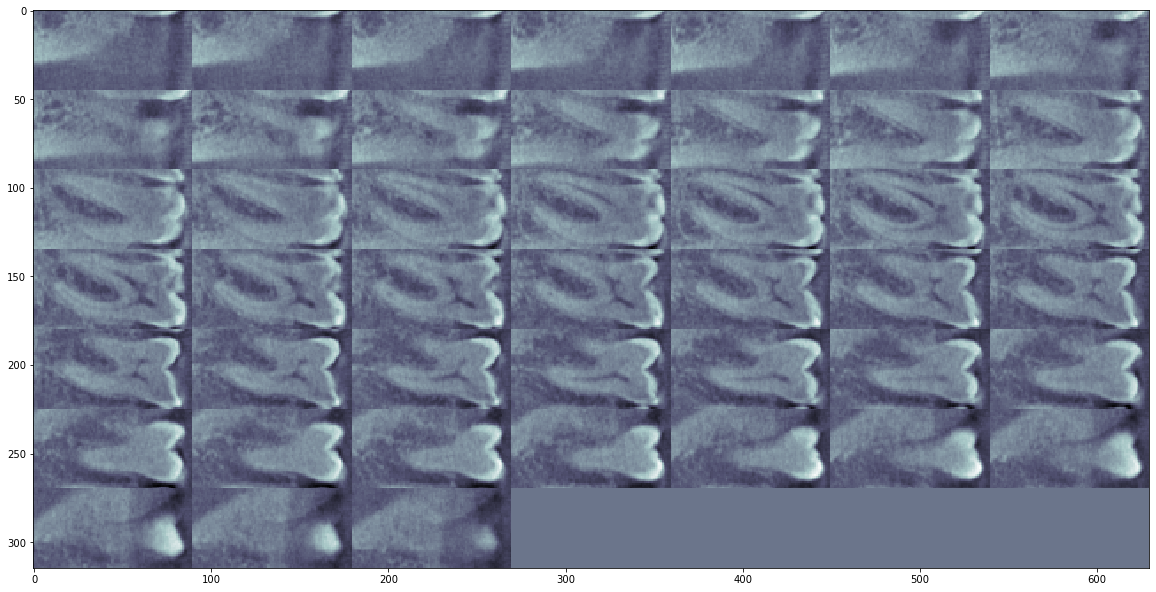

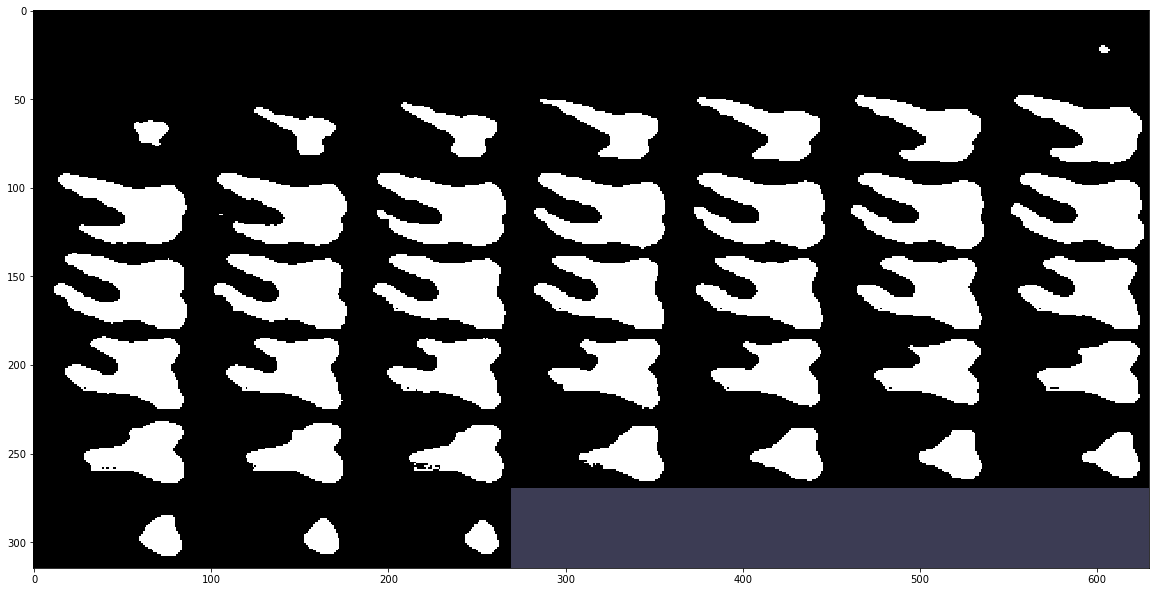

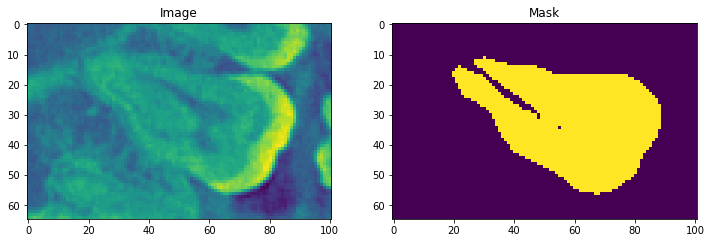

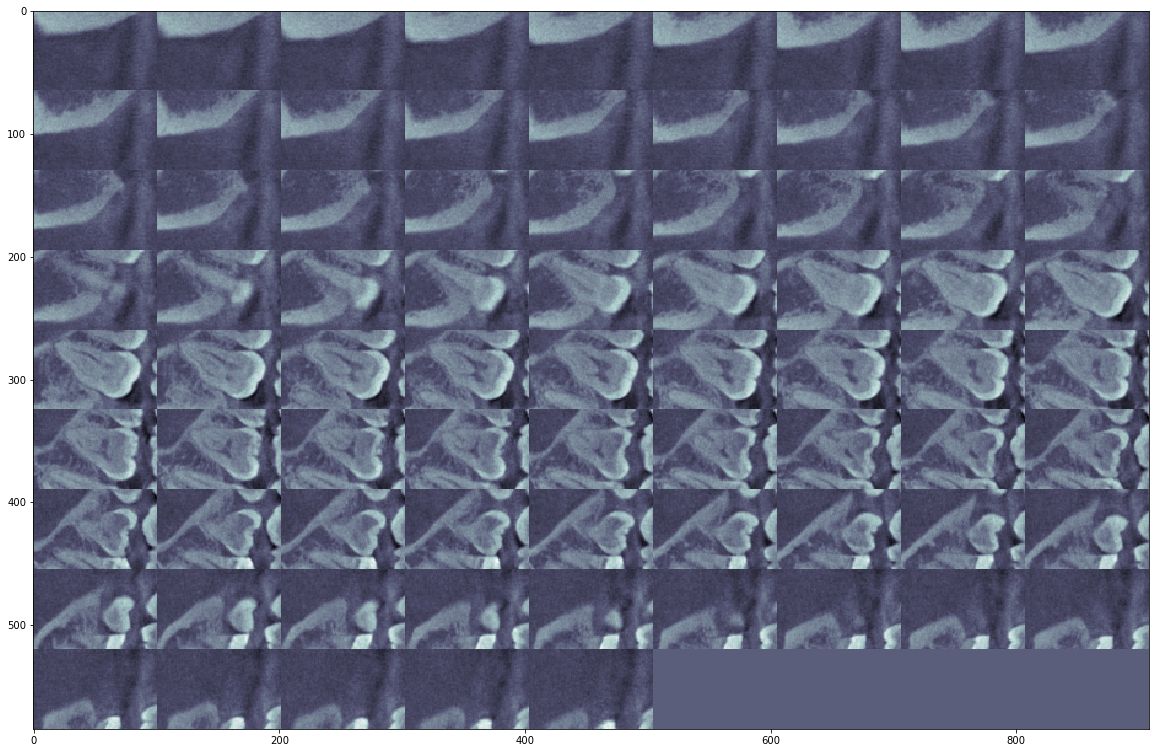

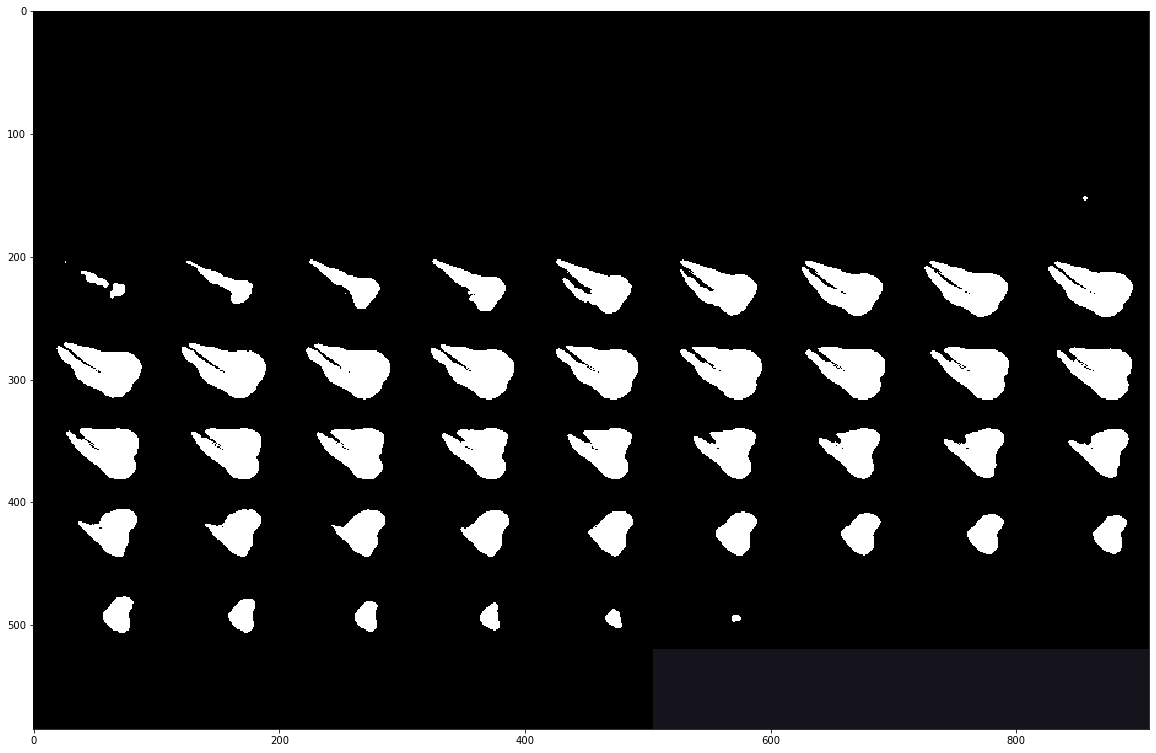

In [41]:


# Datasets
train_dataset = data_dir_train_image
train_labels = data_dir_train_mask

i=0
#labels,meta =read_img(train_labels,backend='nib',channels_axis=int)
for niiImage in os.listdir(data_dir_train_image):
    #print(niiImage)
    inputs = nib.load( os.path.join(data_dir_train_image, niiImage))   
    mask = nib.load( os.path.join(data_dir_train_mask, niiImage)) 
    
    test_image=nib.load( os.path.join(data_dir_train_image, niiImage)).get_fdata()
    test_mask=nib.load( os.path.join(data_dir_train_mask, niiImage)).get_fdata()
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
    ax1.imshow(test_image[test_image.shape[0]//2])
    ax1.set_title('Image')
    ax2.imshow(test_mask[test_image.shape[0]//2])
    ax2.set_title('Mask')
    
    from skimage.util import montage
    fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
    ax1.imshow(montage(test_image), cmap ='bone')


    fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
    ax1.imshow(montage(test_mask), cmap ='bone')
  

In [42]:
from skimage.transform import rescale, resize, downscale_local_mean,rotate
from skimage import data, color
from scipy import ndimage
from scipy import misc
from numpy import fliplr

aug_images = []
aug_masks=[]
    

def rescaleImage(image,mask,scale):
    
    rescaled_image = resize(rescale(image, scale,anti_aliasing=False), (40, 40, 80), anti_aliasing=True) 
    rescaled_mask = resize(rescale(mask, scale,anti_aliasing=False), (40, 40, 80), anti_aliasing=True)
   
  #  print(resize_image2.shape)
  #  if scale == 0.5:
   #     fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
   #     ax1.imshow(montage(resize_image2),cmap='gray')

   #     fig, ax2 = plt.subplots(1, 1, figsize = (20, 20))
   #     ax2.imshow(montage(resize_image),cmap='gray')

    aug_images.append(rescaled_image)
    aug_masks.append(rescaled_mask)

    return (rescaled_image,rescaled_mask)

def rotateImage(image,mask,angle):
    
    rescaled_image = resize(rotate(image, angle), (40, 40, 80), anti_aliasing=True) 
    rescaled_mask = resize(rotate(mask, angle), (40, 40, 80), anti_aliasing=True)
   
  #  print(resize_image2.shape)
  #  if scale == 0.5:
   #     fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
   #     ax1.imshow(montage(resize_image2),cmap='gray')

   #     fig, ax2 = plt.subplots(1, 1, figsize = (20, 20))
   #     ax2.imshow(montage(resize_image),cmap='gray')

    aug_images.append(rescaled_image)
    aug_masks.append(rescaled_mask)
    
    return None

def dataAugmentation(resize_image,resize_mask,scale=None,rotationAngle=None):
    
    if(scale is not None):
        rescaleImage(resize_image,resize_mask,scale)
    
    if(rotationAngle is not None):
        rotateImage(resize_image,resize_mask,rotationAngle)
        rotateImage(resize_image,resize_mask,-rotationAngle)
        
    return (aug_images,aug_masks)

def train():
    
   
    for niiImage in os.listdir(data_dir_train_image):
      #  print(niiImage)
        inputs = nib.load( os.path.join(data_dir_train_image, niiImage))   
        mask = nib.load( os.path.join(data_dir_train_mask, niiImage)) 

      #  from skimage import exposure

     #   image_bright = exposure.adjust_gamma(exposure.rescale_intensity(inputs.get_fdata(),out_range=(0, 127)), gamma=0.5,gain=1)
      #  image_dark = exposure.adjust_gamma(niiImage, gamma=1.5,gain=1)

        old_dims = inputs.shape
        new_dims=(40,40,80)
    
        resize_image = resize(inputs.get_fdata(), (40, 40, 80), anti_aliasing=True)
        resize_mask = resize(mask.get_fdata(), (40, 40, 80), anti_aliasing=True)
        
        aug_images.append(resize_image)
        aug_masks.append(resize_mask)
    
        tempList = dataAugmentation(resize_image,resize_mask,2,10)
         
        img_np = np.rollaxis(np.array(np.array([np.array(tempList[0])]) ),0,5)
        img_mask = np.rollaxis(np.array(np.array([np.array(tempList[1])]) ),0,5)
      
     #   print(len(img_np))
    return (img_np,img_mask)


In [43]:
#print(image_patches)

def unet(n_levels, initial_features=32, n_blocks=2, kernel_size=3, pooling_size=2, in_channels=1, out_channels=1):
    
    
    inputs =  keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH,IMAGE_DEPTH, in_channels))
    x = inputs
    convpars = dict(kernel_size=kernel_size, activation='relu', padding='same')
    
    #downstream
    skips = {}
    for level in range(n_levels):
        for _ in range(n_blocks):
            x = keras.layers.Conv3D(initial_features * 2 ** level, **convpars)(x)
        x = keras.layers.BatchNormalization()(x)
        if level < n_levels - 1:
            skips[level] = x
            x = keras.layers.MaxPool3D(pooling_size)(x)
            
    # upstream
    for level in reversed(range(n_levels-1)):
        x = keras.layers.Conv3DTranspose(initial_features * 2 ** level, strides=pooling_size, **convpars)(x)
        x = keras.layers.Concatenate()([x, skips[level]])
        for _ in range(n_blocks):
            x = keras.layers.Conv3D(initial_features * 2 ** level, **convpars)(x)
        x = keras.layers.BatchNormalization()(x)
      
    # output
    activation = 'sigmoid' if out_channels == 1 else 'softmax'
    x = keras.layers.Conv3D(out_channels, kernel_size=1, activation=activation, padding='same')(x)
    
    return keras.Model(inputs=[inputs], outputs=[x], name=f'UNET3D-L{n_levels}-F{initial_features}')

In [45]:
model= unet(4)
from tensorflow.keras.metrics import MeanIoU,BinaryCrossentropy,Accuracy,Precision,Recall

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()
i,m = train()
from sklearn.utils.class_weight import compute_class_weight

class_weights = tf.cast((tf.cast(np.unique(m),tf.int32)),tf.float32)
#classWeights = compute_class_weight('balanced', class_weights, m)
print(class_weights)

model.fit(i,m,batch_size=2,epochs=300,steps_per_epoch=11,validation_split = 0.2,class_weight =class_weights)

tf.Tensor([0. 0. 0. ... 0. 1. 1.], shape=(540704,), dtype=float32)
Train on 44 samples, validate on 12 samples
Epoch 1/300
22/44 [==============>...............] - ETA: 1s - loss: 0.0368 - accuracy: 0.8301 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00Epoch 56/300


22/44 [==============>...............] - ETA: 1s - loss: 0.0366 - accuracy: 0.8180 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00Epoch 112/300


22/44 [==============>...............] - ETA: 1s - loss: 0.0313 - accuracy: 0.8602 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00Epoch 168/300


22/44 [==============>...............] - ETA: 1s - loss: 0.0341 - accuracy: 0.8403 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00Epoch 224/300


22/44 [==============>...............] - ETA: 1s - loss: 0.0334 - accuracy: 0.8360 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00Epoch 280/300


22/44 [==============>...............] - ETA: 1s - loss: 0.0323 - accuracy: 0.8412 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

In [46]:
model.save(f'model/UNET3D-ToothSegmentation.h5')

In [47]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score
from tensorflow.keras.metrics import MeanIoU,BinaryCrossentropy,Accuracy,Precision,Recall

def test():
    
    ls = []
    x=[]
    y=[]
    tuples=[]
    
    for niiImage in os.listdir(data_dir_test_image):
        print(niiImage)
        inputs = nib.load( os.path.join(data_dir_test_image, niiImage))   
       # mask = nib.load( os.path.join(data_dir_test_mask, niiImage)) 
        
        resize_image = resize(inputs.get_fdata(), (40, 40, 80), anti_aliasing=True)
        resize_mask = resize(mask.get_fdata(), (40, 40, 80), anti_aliasing=True)
       

        img_np = np.rollaxis(np.array(np.array([np.array([np.array(resize_image)]) ])),0,5)
       
        
        pred_mask = model.predict(img_np) > 0.5
        

  
        m = MeanIoU(num_classes=2)
        m.update_state(resize_mask.flatten(), pred_mask.flatten())


        m2 = BinaryCrossentropy()
        m2.update_state(resize_mask.flatten(), pred_mask.flatten())

     #   m3 = dice_coeff(resize_mask,pred_mask) 

        m4 = Accuracy()
        m4.update_state(resize_mask.flatten(), pred_mask.flatten())

        m5 = Precision()
        m5.update_state(resize_mask.flatten(), pred_mask.flatten())

        m6 = Recall()
        m6.update_state(resize_mask.flatten(), pred_mask.flatten())

        print("meanIOU",m.result().numpy(),"Accuracy",m4.result().numpy(),
             "Precision", m5.result().numpy(),"Recall",m6.result().numpy()," Binary cross entropy",m2.result().numpy())

        
        from skimage.measure import marching_cubes_lewiner
        vertices,faces,_,_ = marching_cubes_lewiner(np.transpose(np.transpose(pred_mask[0])[0]))
        
        import meshplot as mp
        mp.plot(vertices, faces, return_plot=False)
        
    return (img_np,pred_mask)

test()

16.2.73.nii


The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.


meanIOU 0.65786695 Accuracy 0.8804609 Precision 0.7872353 Recall 0.686026  Binary cross entropy 1.0648977


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(23.0, 19.…

5.4.84.nii
meanIOU 0.66531867 Accuracy 0.8802031 Precision 0.8143759 Recall 0.510776  Binary cross entropy 1.099013


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(22.5, 24.…

6.12.93.nii
meanIOU 0.49800318 Accuracy 0.7694297 Precision 0.43979493 Recall 0.73405  Binary cross entropy 2.897352


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(21.0, 20.…

4.2.78.nii
meanIOU 0.5911599 Accuracy 0.84750783 Precision 0.6280525 Recall 0.6065565  Binary cross entropy 1.6014149


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(22.25, 21…

30.12.62.nii
meanIOU 0.6490811 Accuracy 0.8688281 Precision 0.705417 Recall 0.6532435  Binary cross entropy 1.2462847


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(18.75, 21…

1.6.86.nii
meanIOU 0.51959246 Accuracy 0.79271096 Precision 0.497696 Recall 0.78555006  Binary cross entropy 2.5328605


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(20.75, 20…

1.2.801.nii
meanIOU 0.48222977 Accuracy 0.7575078 Precision 0.43835336 Recall 0.8035189  Binary cross entropy 3.1178715


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(21.75, 20…

26.2.87.nii
meanIOU 0.64312065 Accuracy 0.87171876 Precision 0.7519961 Recall 0.4986363  Binary cross entropy 1.225038


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(20.5, 18.…

2.5.90.nii
meanIOU 0.5563619 Accuracy 0.8267422 Precision 0.5840825 Recall 0.7818065  Binary cross entropy 2.028451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(21.25, 20…

3.3.82.nii
meanIOU 0.66234213 Accuracy 0.8763359 Precision 0.7660863 Recall 0.5412054  Binary cross entropy 1.1290494


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(22.75, 21…

31.3.91.nii
meanIOU 0.658076 Accuracy 0.87682813 Precision 0.75808126 Recall 0.66345793  Binary cross entropy 1.0818908


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(22.0, 22.…

9.10.90.nii
meanIOU 0.65807724 Accuracy 0.87864846 Precision 0.771144 Recall 0.68313813  Binary cross entropy 1.1026901


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(21.75, 21…

29.4.78.nii
meanIOU 0.80958426 Accuracy 0.91414064 Precision 1.0 Recall 0.63115674  Binary cross entropy 0.11661937


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(24.5, 19.…

9.1.81.nii
meanIOU 0.6783814 Accuracy 0.8860703 Precision 0.8155327 Recall 0.6660249  Binary cross entropy 0.9646873


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(22.0, 20.…

29.6.67.nii
meanIOU 0.28905582 Accuracy 0.50139064 Precision 0.26045996 Recall 0.99507993  Binary cross entropy 7.103024


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(20.25, 18…

14.8.93.nii
meanIOU 0.614063 Accuracy 0.8624453 Precision 0.70288223 Recall 0.71859455  Binary cross entropy 1.4380974


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(22.25, 20…

29.11.92.nii
meanIOU 0.66139454 Accuracy 0.8773516 Precision 0.7946043 Recall 0.47253865  Binary cross entropy 1.1334889


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(22.0, 22.…

(array([[[[[1096.56418659],
           [1098.7562069 ],
           [1045.38949336],
           ...,
           [ 284.14585992],
           [ 287.97049752],
           [ 320.26375292]],
 
          [[1045.46946743],
           [1043.08011014],
           [1031.06808873],
           ...,
           [ 279.19730383],
           [ 320.9938076 ],
           [ 341.19081781]],
 
          [[ 965.886849  ],
           [1020.061967  ],
           [1039.92704598],
           ...,
           [ 348.16808478],
           [ 363.74791356],
           [ 354.88273159]],
 
          ...,
 
          [[  87.27733286],
           [ 136.50564149],
           [ 160.84165302],
           ...,
           [ 242.03409083],
           [ 263.7306867 ],
           [ 275.52095467]],
 
          [[ 113.3438256 ],
           [ 127.05752877],
           [ 153.42869741],
           ...,
           [ 237.51710148],
           [ 262.18002826],
           [ 292.58046348]],
 
          [[ 137.20148458],
           [ 123.008

###### 

In [21]:


x=0
for i in image_patches:
    fout = os.path.join(DATA_PATH, f'sub-volumes/trial{x}.nii')
    save_img(fout, i, meta=None, use_original_ornt=True, backend=None, dtype=None, channels_axis=None, mkdir=False, parents=False)
    x= x+1
    
x=0    
for i in label_patches:
    fout = os.path.join(DATA_PATH, f'sub-volume-mask/trialmask{x}.nii')
    save_img(fout, i, meta=None, use_original_ornt=True, backend=None, dtype=None, channels_axis=None, mkdir=False, parents=False)
    x= x+1
    


NameError: name 'image_patches' is not defined

In [ ]:
import array as arr

def extract_patches(volume, patch_shape, extraction_step,datype='float32'):
    patch_h, patch_w, patch_d = patch_shape[0], patch_shape[1], patch_shape[2]
    stride_h, stride_w, stride_d = extraction_step[0], extraction_step[1], extraction_step[2]
    img_h, img_w, img_d  = volume.shape[0],volume.shape[1],volume.shape[2]

    N_patches_h = (img_h-patch_h)//stride_h+1
    N_patches_w = (img_w-patch_w)//stride_w+1
    N_patches_d = (img_d-patch_d)//stride_d+1
    
    print("number of patches ",N_patches_h , " " , N_patches_w , " " , N_patches_d)
    print("original image ", img_h , " " , img_w , " " , img_d)
    print("patch size ",patch_h , " " , patch_w , " " , patch_d)
    print("stride ", stride_h , " " , stride_w , " " , stride_d)
    
    N_patches_img = N_patches_h * N_patches_w * N_patches_d
    print(N_patches_img)
    raw_patch_martrix = np.zeros((N_patches_img, patch_h, patch_w, patch_d),dtype=datype)
    k=0
    
  #iterator over all the patches
    for h in range((img_h-patch_h)//stride_h+1):
        for w in range((img_w-patch_w)//stride_w+1):
            for d in range((img_d-patch_d)//stride_d+1):
                raw_patch_martrix[k] =(volume[h*stride_h:(h*stride_h)+patch_h,w*stride_w:(w*stride_w)+patch_w,d*stride_d:(d*stride_d)+patch_d])
                k+=1
    #assert(k==N_patches_img)
    return raw_patch_martrix

for niiImage in os.listdir(data_dir_train_mask):
   # if niiImage=='1.2.80.nii':
    print(niiImage)
    plt.title(niiImage)
    labels= nib.load( os.path.join(data_dir_train_mask, niiImage)) 
    label_patches =+extract_patches(labels.get_fdata(),(40,40,80),(40,40,80))
    plt.imshow(labels.get_fdata()[30,:,:,], cmap='gray')

    images= nib.load( os.path.join(data_dir_train_image, niiImage)) 
    image_patches =+extract_patches(images.get_fdata(),(40,40,80),(40,40,80))
    plt.imshow(images.get_fdata()[30,:,:,], cmap='gray')

    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
    for i in image_patches:
        ax1.imshow(i[i.shape[0]//2])
        ax1.set_title('Image')

        from skimage.util import montage2d
        fig, ax1 = plt.subplots(1, 1, figsize = (10, 10))
        ax1.imshow(montage2d(i), cmap ='bone')

    for i in image_patches:
        for j in label_patches:    
            ax2.imshow(j[i.shape[0]//2])
            ax2.set_title('Mask')

            from skimage.util import montage2d
            fig, ax1 = plt.subplots(1, 1, figsize = (10, 10))
            ax1.imshow(montage2d(j), cmap ='bone')


